In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dense,Flatten,Reshape,Conv1D,Dropout,Flatten,BatchNormalization,MaxPooling1D,Concatenate,Add
from tensorflow.keras import Sequential,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model, Sequential, load_model
from sklearn.metrics import confusion_matrix

In [2]:
cred_fr=pd.read_csv("creditcard.csv")

In [4]:
cred_fr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cred_fr.shape

(284807, 31)

In [16]:
cred_fr.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

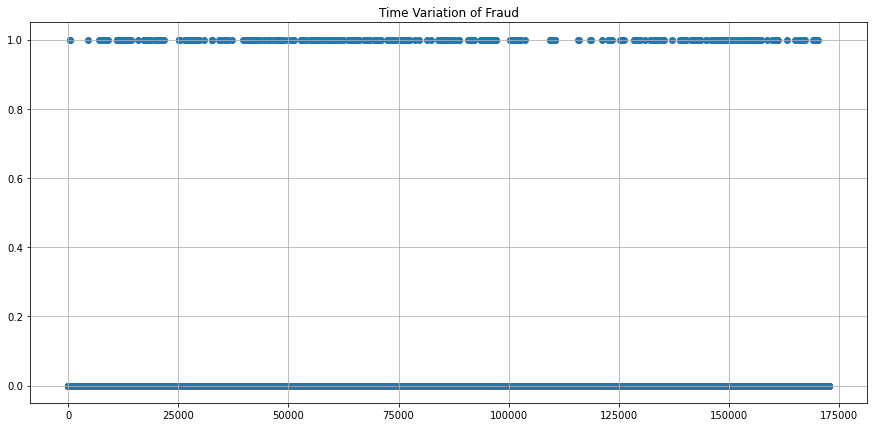

In [17]:
plt.figure(figsize=(15, 7))
plt.scatter(cred_fr.Time,cred_fr.Class)
plt.title('Time Variation of Fraud')
plt.grid(True)
plt.show()

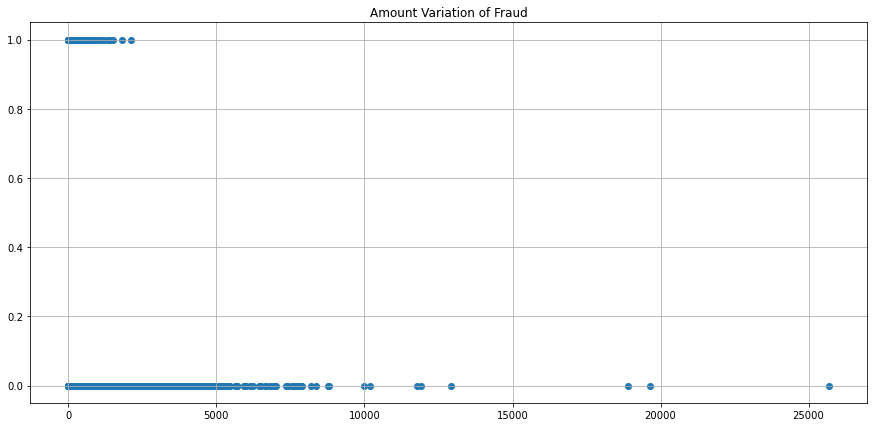

In [18]:
plt.figure(figsize=(15, 7))
plt.scatter(cred_fr.Amount,cred_fr.Class)
plt.title('Amount Variation of Fraud')
plt.grid(True)
plt.show()

In [24]:
corrh=cred_fr.corr()

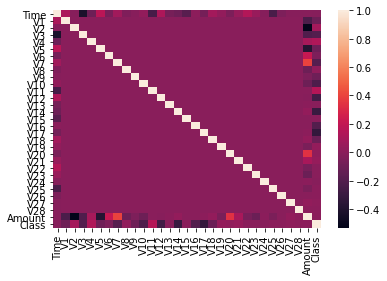

In [25]:
sns.heatmap(corrh,xticklabels=corrh.columns,yticklabels=corrh.columns)

In [28]:
X,Y=cred_fr.drop(columns=["Time","Amount","Class"]),cred_fr['Class']

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33, random_state=42)

In [30]:
X_train_t, X_test_t, y_train_t, y_test_t=train_test_split(cred_fr['Time'],cred_fr['Class'],test_size=0.33, random_state=42)

In [31]:
X_train_a, X_test_a, y_train_a, y_test_a=train_test_split(cred_fr['Amount'],cred_fr['Class'],test_size=0.33, random_state=42)

In [33]:
def df_ex(df,ax1,ax2):
    df=df.to_numpy()
    df=df.reshape(df.shape[0],ax1,ax2)
    return df

In [13]:
X_train=X_train.to_numpy()


In [10]:
x = tf.ones((1, 4))
tf.data.Dataset.from_tensor_slices(
    

In [19]:
#cred_fr2=cred_fr.reshape(cred_fr.shape[0],cred_fr.shape[1])

In [14]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [34]:
X_train=df_ex(X_train,X_train.shape[1],1)

In [36]:
X_train_t=df_ex(X_train_t,1,1)

In [38]:
X_train_a=df_ex(X_train_a,1,1)

In [38]:
def base_dl_model():
    model=Sequential()
    model.add(Input(shape=X_train.shape[1:],))
    model.add(Conv1D(32,2,activation="relu"))
    model.add(BatchNormalization(momentum=0.04))
    model.add(MaxPooling1D(2))

    model.add(Conv1D(16,2,activation="relu"))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(16))
        
    #model.add(Dense(2,activation="softmax"))
    #model.add(Dense(1,activation="sigmoid"))
    #model.compile(loss='categorical_crossentropy', optimizer='adam')
    #model.compile(loss='binary_crossentropy', optimizer='adam')

    return model

In [39]:
def lstm_shell():
    model=Sequential()
    model.add(Input(shape=X_train_t.shape[1:],))
    model.add(LSTM(8))
    model.add(BatchNormalization(momentum=0.04 ))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(16))
    #model.add(Dense(1,activation="sigmoid"))
    #model.compile(loss='binary_crossentropy', optimizer='adam')

    return model

In [40]:
def dense_shell():
    model=Sequential()
    model.add(Input(shape=X_train_a.shape[1:],))
    model.add(Dense(30))
    model.add(BatchNormalization(momentum=0.04 ))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(16))
    #model.add(Dense(1,activation="sigmoid"))
    #model.compile(loss='binary_crossentropy', optimizer='adam')

    return model

In [40]:
#model=Sequential()
#model.add(Input(shape=X_train.shape[1:],))
input_cnn = Input(shape=X_train.shape[1:],)

cnn=Conv1D(32,2,activation="relu")(input_cnn)
cnn=BatchNormalization(momentum=0.04)(cnn)
cnn=MaxPooling1D(2)(cnn)
cnn=Conv1D(16,2,activation="relu")(cnn)
cnn=Dropout(0.1)(cnn)
cnn=Flatten()(cnn)
cnn=Dense(16)(cnn)
cnn = Model(inputs=input_cnn, outputs=cnn)

In [41]:
#model=Sequential()
#model.add(Input(shape=X_train_t.shape[1:],))
input_lstm = Input(shape=X_train_t.shape[1:],)
lsm_form=LSTM(8)(input_lstm)
lsm_form=BatchNormalization(momentum=0.04 )(lsm_form)
lsm_form=Dropout(0.1)(lsm_form)
lsm_form=Flatten()(lsm_form)
lsm_form=Dense(16)(lsm_form)
    #
lsm_form = Model(inputs=input_lstm, outputs=lsm_form)

In [42]:
desne_input=Input(shape=X_train_a.shape[1:],)
#input_a = Input(shape=X_train_t.shape[1:],)
desne_net=Dense(30)(desne_input)
desne_net=BatchNormalization(momentum=0.04 )(desne_net)
desne_net=Dropout(0.1)(desne_net)
desne_net=Flatten()(desne_net)
desne_net=Dense(16)(desne_net)
desne_net = Model(inputs=desne_input, outputs=desne_net)

In [48]:
combined = Concatenate(axis=-1)([cnn.output,lsm_form.output, desne_net.output])

In [49]:
out=Dense(1,activation="sigmoid")(combined)

In [50]:
cnn.input

<tf.Tensor 'input_1:0' shape=(None, 28, 1) dtype=float32>

In [51]:
model = Model(inputs=[input_cnn, input_lstm,desne_input], outputs=out)

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
model.fit([X_train,X_train_t,X_train_a],y_train,epochs=20)

Epoch 1/20
5964/5964 [==============================] - 37s 6ms/step - loss: 0.0074 - accuracy: 0.9981
Epoch 2/20
5964/5964 [==============================] - 37s 6ms/step - loss: 0.0041 - accuracy: 0.9992
Epoch 3/20
5964/5964 [==============================] - 38s 6ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/20
5964/5964 [==============================] - 38s 6ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 5/20
5964/5964 [==============================] - 39s 6ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 6/20
5964/5964 [==============================] - 39s 6ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 7/20
5964/5964 [==============================] - 41s 7ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 8/20
5964/5964 [==============================] - 40s 7ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 9/20
5964/5964 [==============================] - 41s 7ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 10/20
5964/5964 [==============================] - 42s 7ms/step - l

In [54]:
preds=model.predict([[X_test,X_test_t,X_test_a]])

In [160]:
preds

array([[9.9830449e-01],
       [7.9584197e-07],
       [8.0200536e-08],
       ...,
       [5.4639781e-08],
       [1.3436906e-05],
       [1.2473936e-07]], dtype=float32)

In [165]:
 neg_indx=[0,   565,  3025,  3228,  4178,  4640,  5100,  5756,  6054,
             6368,  7011,  7846,  8090,  8379,  8456,  9203, 10279, 10634,
            11066, 11245, 13509, 16473, 16564, 16592, 16839, 17345, 17388,
            18130, 18544, 18785, 18861, 19281, 19442, 19821, 20031, 21199,
            22412, 22588, 22718, 22797, 23380, 24197, 25774, 25903, 27670,
            27885, 28803, 30129, 30923, 30971, 31055, 31337, 31575, 32102,
            32656, 32949, 33127, 34064, 35049, 35931, 36216, 36674, 36677,
            36918, 37190, 37427, 37841, 37881, 38134, 40555, 40663, 40729,
            41451, 41626, 43088, 43475, 44671, 45276, 45516, 46943, 47649,
            48678, 48954, 50442, 50500, 51016, 51622, 53465, 53920, 54605,
            55409, 55459, 55764, 55799, 56196, 56282, 56288, 56467, 57389,
            57800]

In [178]:
import numpy as np
np.mean(preds[neg_indx])#,max(preds[neg_indx])[0]

0.7760672

In [179]:
np.std(preds[neg_indx])#,max(preds[neg_indx])[0]

0.3611002

In [174]:
y_test.value_counts()

0    93838
1      149
Name: Class, dtype: int64

In [55]:
rest=[0 if i<0.5 else 1 for i in preds ]

In [186]:
import collections
collections.Counter(rest)

Counter({1: 154, 0: 93833})

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rest)

array([[93662,   176],
       [   25,   124]], dtype=int64)

In [164]:
preds[0],preds[57800],preds[3228],preds[13509]

(array([0.9983045], dtype=float32),
 array([0.9936359], dtype=float32),
 array([0.00012887], dtype=float32),
 array([0.5082412], dtype=float32))

In [145]:
from tensorflow.keras.utils import plot_model

In [154]:
!pip3 install graphviz

You should consider upgrading via the 'c:\users\91914\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [155]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [24]:
X_train.shape

(190820, 28, 1)

In [41]:
model=base_dl_model()

In [42]:
model_l=lstm_shell()

In [44]:
model_d=dense_shell()

In [45]:
model.output,model_l.output,model_d.output

(<tf.Tensor 'dense_1/Identity:0' shape=(None, 16) dtype=float32>,
 <tf.Tensor 'dense_2/Identity:0' shape=(None, 16) dtype=float32>,
 <tf.Tensor 'dense_4/Identity:0' shape=(None, 16) dtype=float32>)

In [46]:
merged = Add()([model.output,model_l.output,model_d.output])

In [57]:
X_train.shape,X_train_t.shape,X_train_a.shape

((190820, 28, 1), (190820, 1, 1), (190820, 1, 1))

In [62]:
tupl=((X_train),(X_train_t),(X_train_a))

In [68]:
tupl[1].shape

(190820, 1, 1)

In [53]:
out=Dense(1,activation="sigmoid")(merged)

In [69]:
model = Model(inputs=tupl, outputs=out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'Model' is not defined

In [54]:
out.compile()

AttributeError: 'Tensor' object has no attribute 'compile'

In [166]:
model_d.fit(X_train_a,y_train,epochs=10)

Epoch 1/10
5964/5964 [==============================] - 14s 2ms/step - loss: 0.0688
Epoch 2/10
5964/5964 [==============================] - 14s 2ms/step - loss: 0.0143
Epoch 3/10
5964/5964 [==============================] - 13s 2ms/step - loss: 0.0138
Epoch 4/10
5964/5964 [==============================] - 13s 2ms/step - loss: 0.0138
Epoch 5/10
5964/5964 [==============================] - 14s 2ms/step - loss: 0.0137
Epoch 6/10
5964/5964 [==============================] - 14s 2ms/step - loss: 0.0135
Epoch 7/10
5964/5964 [==============================] - 14s 2ms/step - loss: 0.0135
Epoch 8/10
5964/5964 [==============================] - 14s 2ms/step - loss: 0.0135
Epoch 9/10
5964/5964 [==============================] - 14s 2ms/step - loss: 0.0135
Epoch 10/10
5964/5964 [==============================] - 14s 2ms/step - loss: 0.0134


In [167]:
model_d.save("dense_model.h5")
model_d.save_weights("dense_model.h5")

In [157]:
model_l.fit(X_train_t,y_train,epochs=10)

In [158]:
X_test_t.shape

(93987, 1, 1)

In [159]:
X_test_t=X_test_t.to_numpy()
#X_test_t=X_test_t.reshape(190820,1,1)

In [93]:
X_train_a=X_test_t.reshape(93987,1,1)

In [94]:
X_test_t.shape

(93987, 1, 1)

In [105]:
time_pre=model_l.predict(X_test_t)

In [106]:
time_pre=[i[0] for i in time_pre]

In [169]:
X_test_a=X_test_a.to_numpy()

In [170]:
X_test_a=X_test_a.reshape(93987,1,1)

In [171]:
test_pr=model_d.predict(X_test_a,return=)

In [173]:
collections.Counter([i[0] for i in test_pr])

Counter({0.0018378794: 1,
         0.0019020438: 4,
         0.0017076731: 81,
         0.0016966164: 674,
         0.0016963184: 1686,
         0.0017339289: 282,
         0.0017024279: 180,
         0.001699388: 359,
         0.0016997755: 966,
         0.0017344356: 20,
         0.0017124116: 23,
         0.0017041564: 49,
         0.0017553568: 28,
         0.0017118454: 76,
         0.001696378: 5332,
         0.0016992688: 63,
         0.0017059445: 38,
         0.0017246902: 76,
         0.0017046332: 37,
         0.0017133653: 50,
         0.0016988218: 80,
         0.0017049909: 133,
         0.0018048584: 3,
         0.001737386: 53,
         0.0017289221: 43,
         0.0017043054: 263,
         0.0017315447: 39,
         0.0017102361: 24,
         0.0016967654: 1120,
         0.0036677718: 1,
         0.0017342865: 5,
         0.0017110705: 714,
         0.0016998053: 1789,
         0.0017392337: 47,
         0.0017095506: 230,
         0.0017072856: 309,
         0.0017269

In [176]:
test_pr[565],test_pr[41451],test_pr[55459]

(array([0.00181651], dtype=float32),
 array([0.00173384], dtype=float32),
 array([0.00169638], dtype=float32))

In [182]:
test_pr[0]

array([0.00183788], dtype=float32)

In [109]:
collections.Counter(time_pre)

Counter({0.0020857751: 93979,
         0.00024008751: 1,
         0.0020186007: 1,
         0.0020857155: 2,
         0.0015851557: 1,
         0.0020858373: 3})

In [114]:
#x_train.shape
pre_t=[0 if j>0.0020857750 else 1 for j in time_pre]

In [115]:
collections.Counter(pre_t)

Counter({0: 93982, 1: 5})

In [116]:
confusion_matrix(y_test,pre_t)

array([[93833,     5],
       [  149,     0]], dtype=int64)

In [83]:
model_l.save_weights("lstm_weights.h5")
model_l.save("lstm_model.h5")

In [78]:
y_train.value_counts()

0    190477
1       343
Name: Class, dtype: int64

In [227]:
#y_train=y_train.map({0:"NF",1:"F"})

In [22]:
y_train.value_counts()

0    190477
1       343
Name: Class, dtype: int64

In [193]:
X = [0,1]]
enc=OneHotEncoder()
enc.fit(X)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [303]:
#y_train

In [17]:
catrep=pd.get_dummies(y_train)

In [235]:
catrep.fillna(-1)[1].value_counts()

0    190477
1       343
Name: 1, dtype: int64

In [207]:
#enc.inverse_transform(y_train)
catrep[1].value_counts()

0    190477
1       343
Name: 1, dtype: int64

In [69]:
X_train.shape[1:]

(190820, 1)

In [77]:
X_train.shape

(190820, 30, 1)

In [23]:
y_train.shape

(190820,)

In [18]:
catrep.to_numpy()

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [230]:
#weights = class_weight.compute_class_weight('balanced',                                           np.unique(y_train),  y_train)

#X_train
y_train.shape

(190820,)

In [237]:
#X_train

In [27]:
model.fit(X_train,y_train,epochs=10)#,loss="binary_crossentropy",optimizer="adam",)

Epoch 1/10
5964/5964 [==============================] - 49s 8ms/step - loss: 0.0063
Epoch 2/10
5964/5964 [==============================] - 40s 7ms/step - loss: 0.0038
Epoch 3/10
5964/5964 [==============================] - 41s 7ms/step - loss: 0.0035
Epoch 4/10
5964/5964 [==============================] - 39s 7ms/step - loss: 0.0034
Epoch 5/10
5964/5964 [==============================] - 40s 7ms/step - loss: 0.0034
Epoch 6/10
5964/5964 [==============================] - 40s 7ms/step - loss: 0.0034: 0s - loss: 0.00 - ETA: 0s - loss:
Epoch 7/10
5964/5964 [==============================] - 40s 7ms/step - loss: 0.0032
Epoch 8/10
5964/5964 [==============================] - 40s 7ms/step - loss: 0.0031
Epoch 9/10
5964/5964 [==============================] - 40s 7ms/step - loss: 0.0031: 0s - 
Epoch 10/10
5964/5964 [==============================] - 43s 7ms/step - loss: 0.0031


In [82]:
model.save_weights("convd_weights.h5")
model.save("convd_model.h5")

In [31]:
X_test=X_test.to_numpy()
#X_test.shape

In [32]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [40]:
cust=y_test.reset_index().drop(columns="index")

In [41]:
cust.loc[cust['Class']==1].index[0:100]

Int64Index([    0,   565,  3025,  3228,  4178,  4640,  5100,  5756,  6054,
             6368,  7011,  7846,  8090,  8379,  8456,  9203, 10279, 10634,
            11066, 11245, 13509, 16473, 16564, 16592, 16839, 17345, 17388,
            18130, 18544, 18785, 18861, 19281, 19442, 19821, 20031, 21199,
            22412, 22588, 22718, 22797, 23380, 24197, 25774, 25903, 27670,
            27885, 28803, 30129, 30923, 30971, 31055, 31337, 31575, 32102,
            32656, 32949, 33127, 34064, 35049, 35931, 36216, 36674, 36677,
            36918, 37190, 37427, 37841, 37881, 38134, 40555, 40663, 40729,
            41451, 41626, 43088, 43475, 44671, 45276, 45516, 46943, 47649,
            48678, 48954, 50442, 50500, 51016, 51622, 53465, 53920, 54605,
            55409, 55459, 55764, 55799, 56196, 56282, 56288, 56467, 57389,
            57800],
           dtype='int64')

In [36]:
#X.columns

In [33]:
prt=model.predict(X_test)

In [37]:
prt[0][0]

0.82092357

In [42]:
prt[565][0]

0.9720627

In [45]:
c[10][0]

7.684969e-06

In [46]:
y_test.value_counts()

0    93838
1      149
Name: Class, dtype: int64

In [62]:
res=[ 1 if [i][0]>0.05 else 0 for i in prt ]

In [48]:
import collections 
collections.Counter(res)

Counter({1: 148, 0: 93839})

In [330]:
z_c=[prt[i][0] for i in range(0,len(prt))]
th=[0 if i<0.6 else 1 for i in z_o]

In [327]:
y_test.value_counts()

0    93838
1      149
Name: Class, dtype: int64

In [331]:
collections.Counter(th)

Counter({1: 137, 0: 93850})

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,res)

array([[93741,    97],
       [   28,   121]], dtype=int64)

In [188]:
confusion_matrix(y_test,rest)

array([[93810,    28],
       [   23,   126]], dtype=int64)

In [324]:
prt[57800][0]

0.031308953

In [310]:
prt[1][0]

0.9999994

In [285]:
z_c=[prt[i][0] for i in range(0,len(prt))]

In [286]:
z_o=[prt[i][1] for i in range(0,len(prt))]

In [291]:
th=[1 if i<0.0001 else 0 for i in z_o]

In [292]:
collections.Counter(th)

Counter({0: 21061, 1: 72926})

In [260]:
import collections
#collections.Counter(z_o)

In [248]:
y_test.value_counts()

0    93838
1      149
Name: Class, dtype: int64

In [131]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
211399    0
245040    0
97433     0
94007     0
176304    0
Name: Class, Length: 93987, dtype: int64

In [164]:
thrse=[0 if i>0.000000005 else 1  for i in prt]

In [289]:
import collections
collections.Counter(thrse)

Counter({0: 89815, 1: 4172})

In [112]:
import numpy as np

In [113]:
unique, counts = np.unique(prt, return_counts=True)

In [115]:
unique,counts

(array([1.0599164e-10, 7.8151136e-10, 1.2341467e-09, ..., 9.9999952e-01,
        9.9999964e-01, 1.0000000e+00], dtype=float32),
 array([1, 1, 1, ..., 5, 1, 3], dtype=int64))

In [118]:
dic_count={}
for i,j in zip(unique, counts):
    dic_count[i]=j 

In [119]:
dic_count

{1.0599164e-10: 1,
 7.8151136e-10: 1,
 1.2341467e-09: 1,
 1.4165223e-09: 1,
 1.4585524e-09: 1,
 2.1748954e-09: 1,
 2.3293292e-09: 1,
 3.3029242e-09: 1,
 4.9634807e-09: 1,
 4.9847704e-09: 1,
 5.9904357e-09: 1,
 6.1355134e-09: 1,
 6.139599e-09: 1,
 7.468981e-09: 1,
 7.5150375e-09: 1,
 8.63347e-09: 1,
 9.283338e-09: 1,
 1.1047854e-08: 1,
 1.1149506e-08: 1,
 1.1157548e-08: 1,
 1.1339935e-08: 2,
 1.2303703e-08: 1,
 1.2316359e-08: 1,
 1.262352e-08: 1,
 1.291024e-08: 1,
 1.2987594e-08: 1,
 1.3338283e-08: 1,
 1.4638959e-08: 1,
 1.6264572e-08: 1,
 1.703388e-08: 1,
 1.7423364e-08: 1,
 1.7931582e-08: 1,
 1.8059334e-08: 1,
 1.8557657e-08: 1,
 2.001e-08: 1,
 2.0118417e-08: 1,
 2.1982766e-08: 1,
 2.4133216e-08: 1,
 2.4956485e-08: 1,
 2.5321658e-08: 1,
 2.6393009e-08: 1,
 2.642076e-08: 1,
 2.729977e-08: 1,
 2.960588e-08: 1,
 3.1155974e-08: 1,
 3.369124e-08: 1,
 3.5305153e-08: 1,
 3.743312e-08: 1,
 3.749186e-08: 1,
 3.8533372e-08: 1,
 4.068453e-08: 1,
 4.1784364e-08: 1,
 4.1925908e-08: 1,
 4.3082792e-

In [108]:
import collections
collections.Counter(prt)

TypeError: unhashable type: 'numpy.ndarray'

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            12212512  
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 928)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 929       
Total params: 12,213,441
Trainable params: 12,213,441
Non-trainable params: 0
_________________________________________________________________


In [12]:
cred_fr.shape

(284807, 31)

In [8]:
cred_fr['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
for i in cred_fr.columns:
    try:
        cred_fr[i]=pd.to_numeric(cred_fr[i])
    except:
        print(i)

In [9]:
0/3

0.0

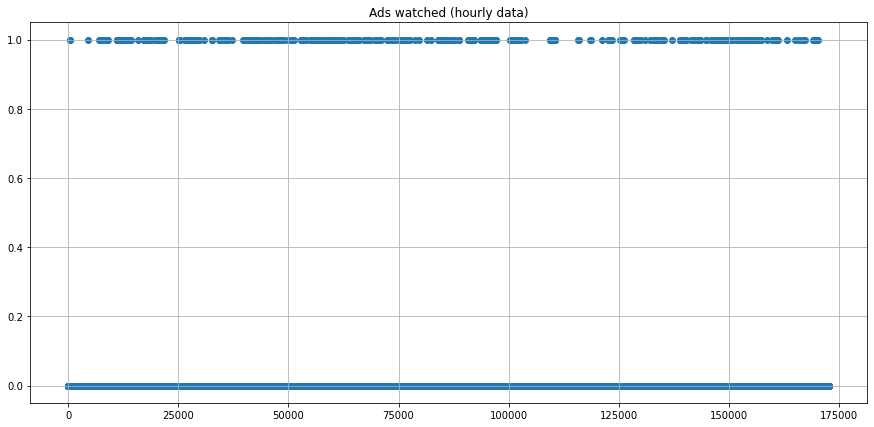

In [9]:
plt.figure(figsize=(15, 7))
plt.scatter(cred_fr.Time,cred_fr.Class)
plt.title('Time Variation of Fraud')
plt.grid(True)
plt.show()

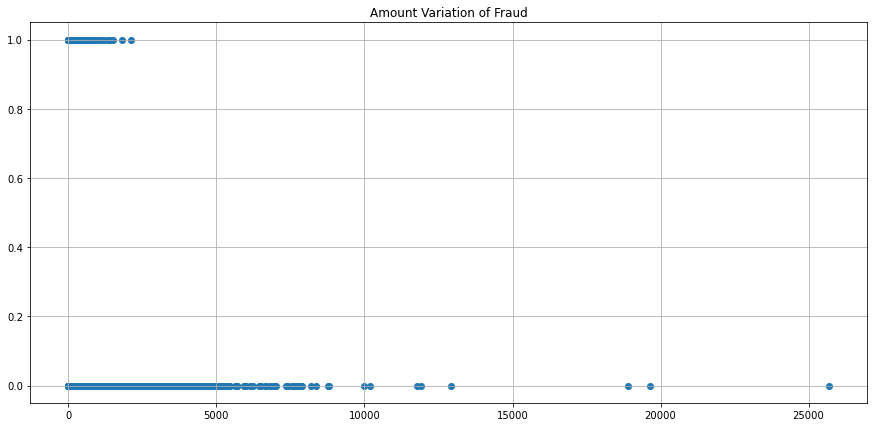

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'] but received: Time

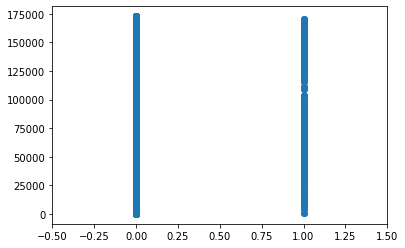

In [23]:
#sns.lineplot(x="Time", y="Class",data=cred_fr)
#sns.catplot(x="Time", y="Amount", hue="Class", data=cred_fr)
import numpy as np
df = pd.DataFrame({"x" : np.random.choice([1,17,99], size=100),
                   "y" : np.random.rand(100)*100})

plt.scatter(cred_fr["Class"],cred_fr["Time"])
plt.margins(x=0.5)
plt.show()

In [12]:
sns.lineplot(x="Time", y="Class",
             hue="region", style="event",
             data=cred_fr)

ValueError: Could not interpret input 'region'

In [10]:
cred_fr['Class'].value_counts()

KeyError: 'time'